## Importing Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("final_dataset.csv")
df.head()

index                                               text  hate  \
0     48  @odysseuslahori @IqShoaib Hang till death all ...     1   
1     84  "where they ultimately need to be" is back in ...     1   
2    126  "I'm trying to take you out" to "you don't loo...     1   
3    298            Facts . That's why I cut these hoes off     1   
4    454  "I'm a whore! Yay! Glorify being a whore! This...     1   

                                               audio  
0  /content/drive/MyDrive/IPD/code/audio/claude_t...  
1  /content/drive/MyDrive/IPD/code/audio/claude_t...  
2  /content/drive/MyDrive/IPD/code/audio/claude_t...  
3  /content/drive/MyDrive/IPD/code/audio/claude_t...  
4  /content/drive/MyDrive/IPD/code/audio/claude_t...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   1000 non-null   int64 
 1   text    1000 non-null   object
 2   hate    1000 non-null   int64 
 3   audio   1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [ ]:
df.describe()

index         hate
count    1000.000000  1000.000000
mean    71057.600000     0.677000
std     38294.228375     0.467857
min        48.000000     0.000000
25%     38340.500000     0.000000
50%     71093.000000     1.000000
75%    104083.750000     1.000000
max    135302.000000     1.000000

In [ ]:
df["hate"].value_counts()

hate
1    677
0    323
Name: count, dtype: int64

## Visualization

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def visualize_audio(file_path, title):
    y, sr = librosa.load(file_path, sr=None)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform ({title})')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(1, 2, 2)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
    plt.title(f'Spectrogram ({title})')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    plt.tight_layout()
    plt.show()

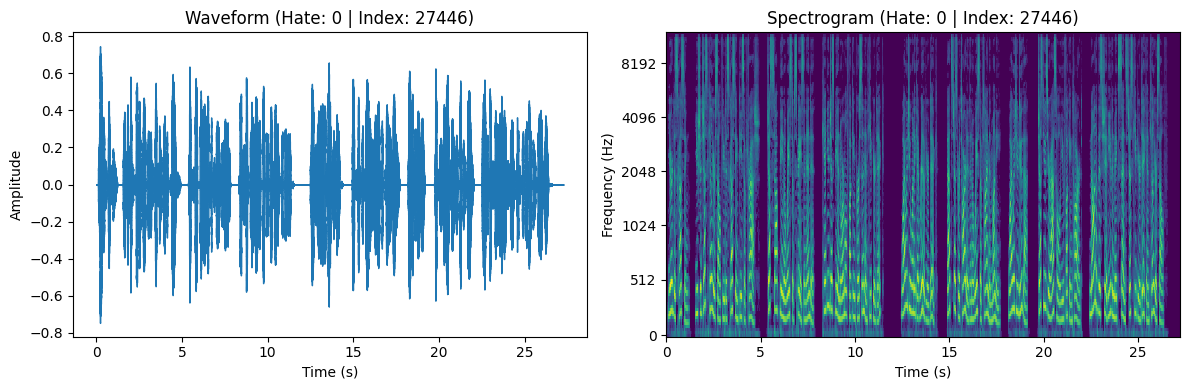

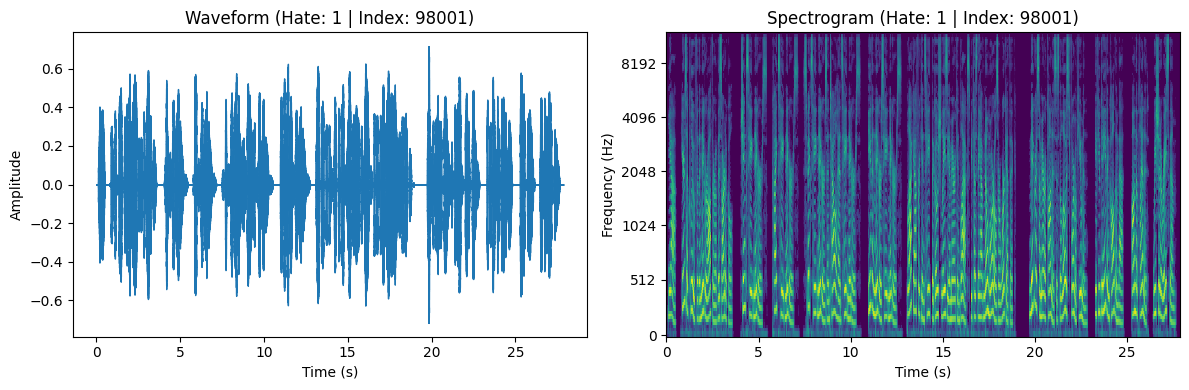

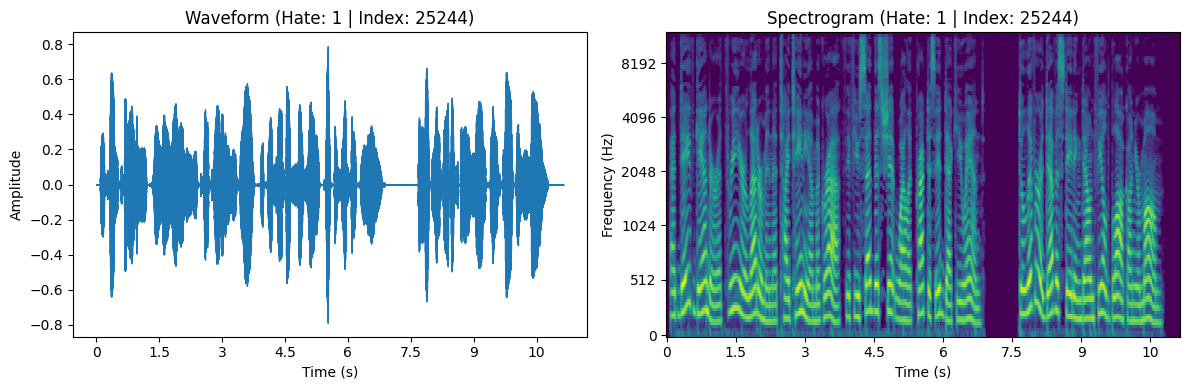

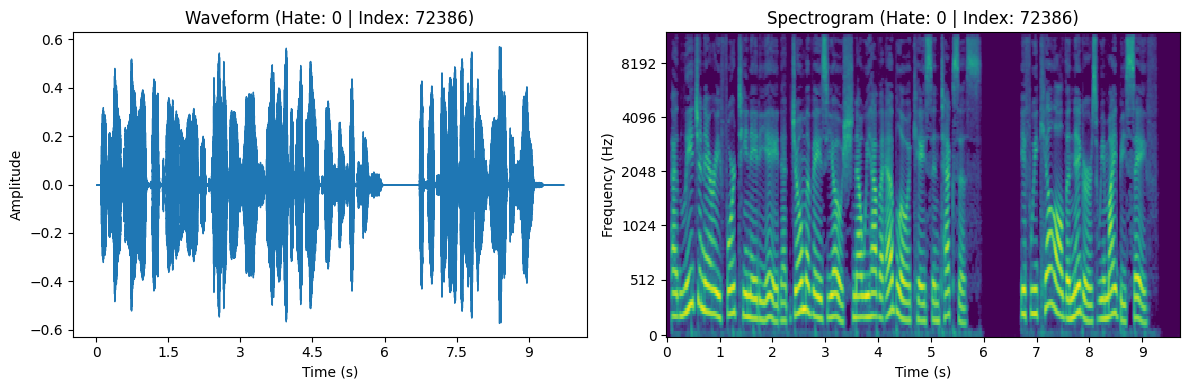

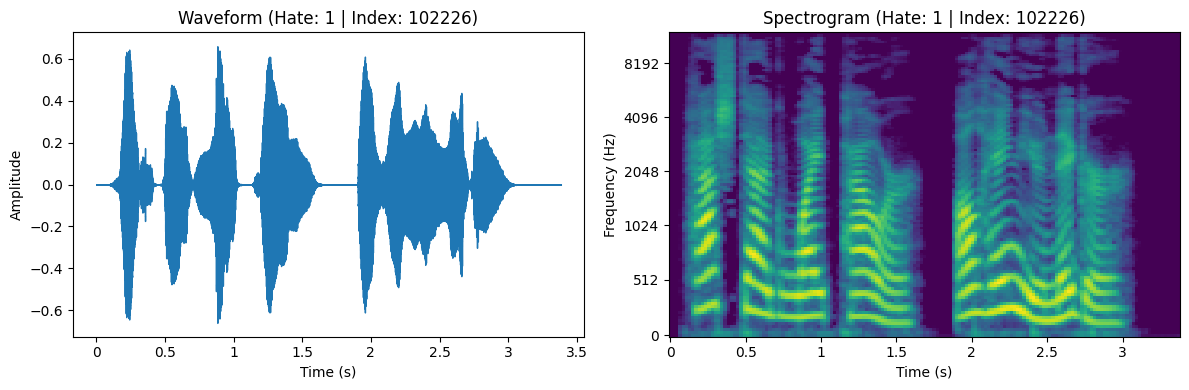

In [ ]:
for idx, row in df.sample(5).iterrows():
    visualize_audio(row['audio'], f"Hate: {row['hate']} | Index: {row['index']}")

In [ ]:
def visualize_log_spectrogram(file_path, title):
    y, sr = librosa.load(file_path, sr=None)

    S = librosa.feature.melspectrogram(y=y, sr=sr)
    log_S = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Log Mel Spectrogram ({title})')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

In [ ]:
def visualize_chroma(file_path, title):
    y, sr = librosa.load(file_path, sr=None)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar()
    plt.title(f'Chroma Features ({title})')
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch Class')
    plt.tight_layout()
    plt.show()

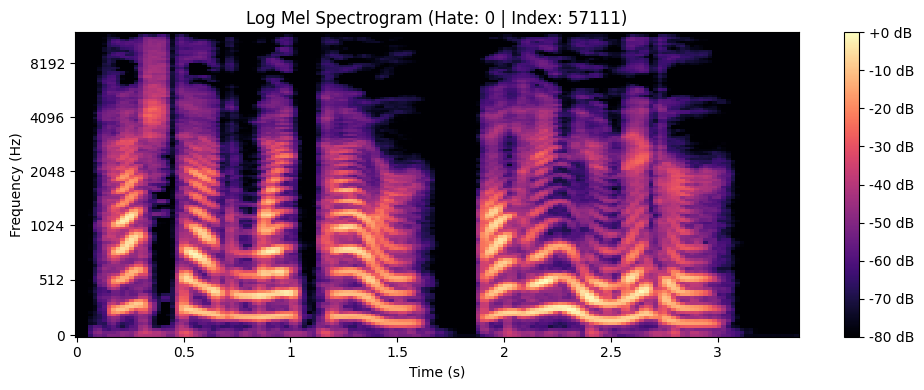

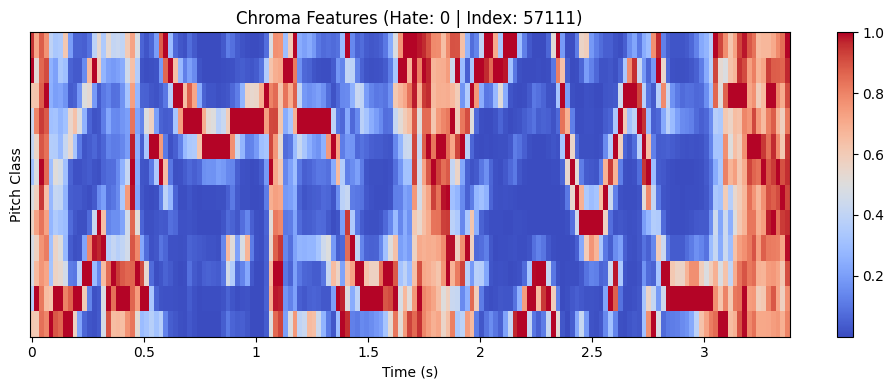

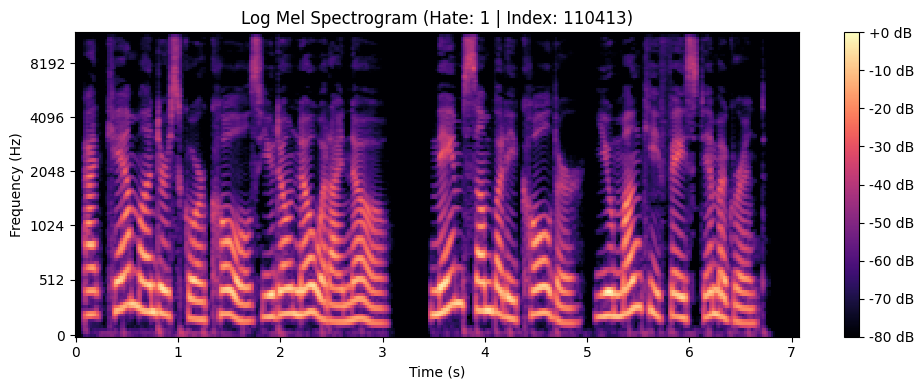

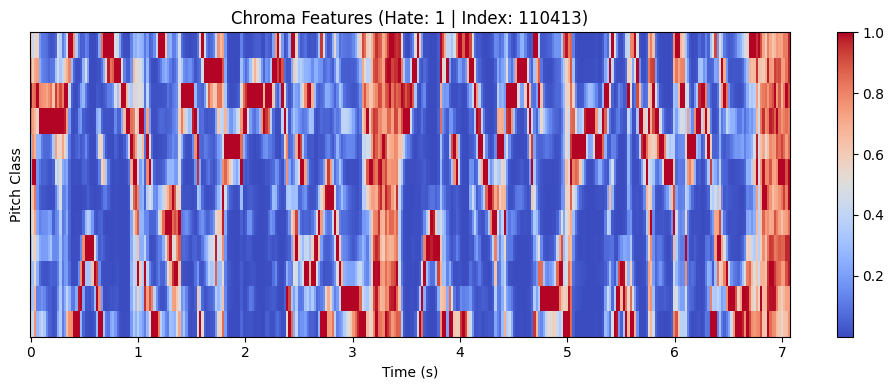

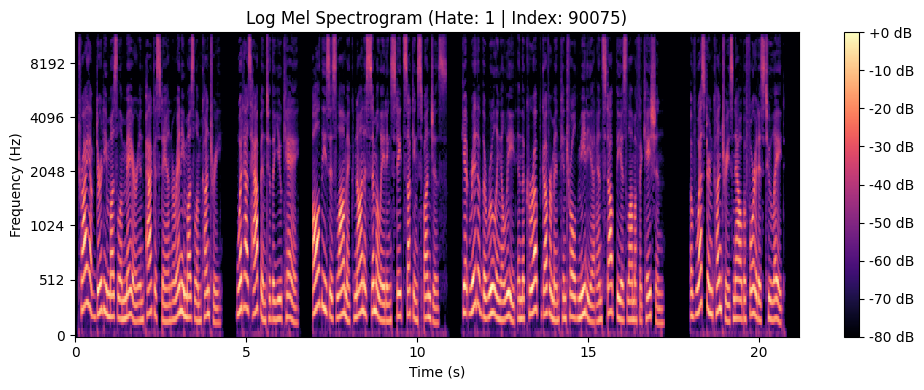

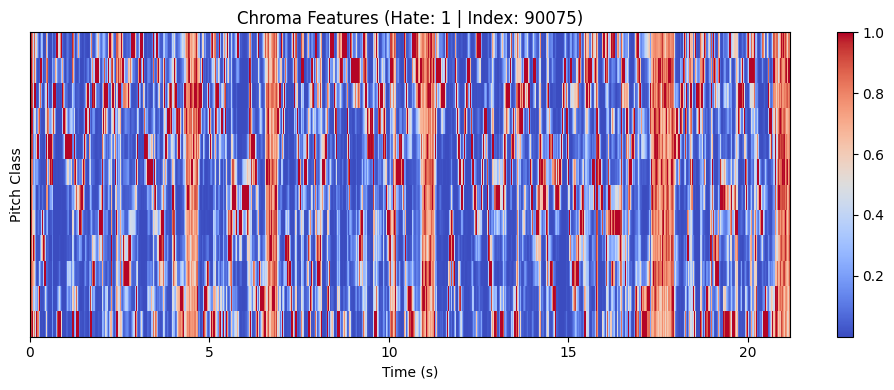

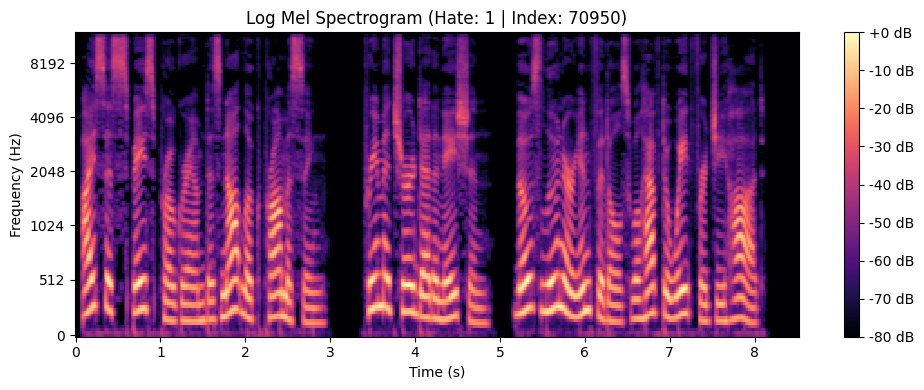

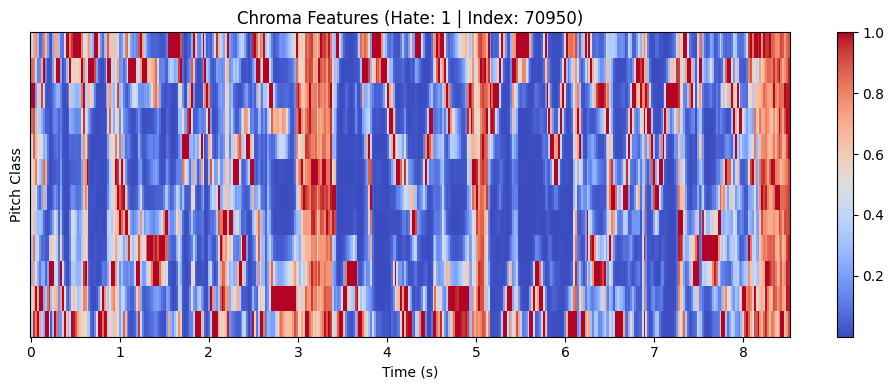

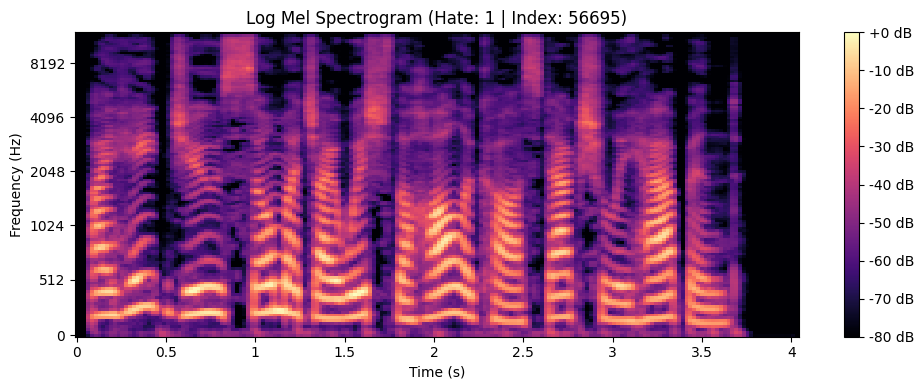

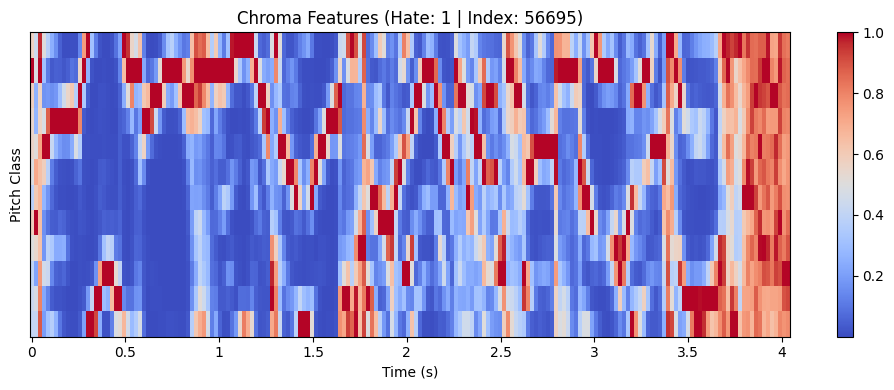

In [ ]:
for idx, row in df.sample(5).iterrows():
    title = f"Hate: {row['hate']} | Index: {row['index']}"
    file_path = row['audio']

    visualize_log_spectrogram(file_path, title)
    visualize_chroma(file_path, title)

In [ ]:
def visualize_zero_crossing_rate(file_path, title):
    y, sr = librosa.load(file_path, sr=None)
    zcr = librosa.feature.zero_crossing_rate(y)

    plt.figure(figsize=(10, 4))
    plt.plot(zcr[0], color='blue')
    plt.title(f'Zero Crossing Rate: {title}')
    plt.xlabel('Frames')
    plt.ylabel('Rate')
    plt.tight_layout()
    plt.show()

In [ ]:
def visualize_rms_energy(file_path, title):
    y, sr = librosa.load(file_path, sr=None)
    rms = librosa.feature.rms(y=y)

    plt.figure(figsize=(10, 4))
    plt.plot(rms[0], color='red')
    plt.title(f'RMS Energy: {title}')
    plt.xlabel('Frames')
    plt.ylabel('RMS Energy')
    plt.tight_layout()
    plt.show()

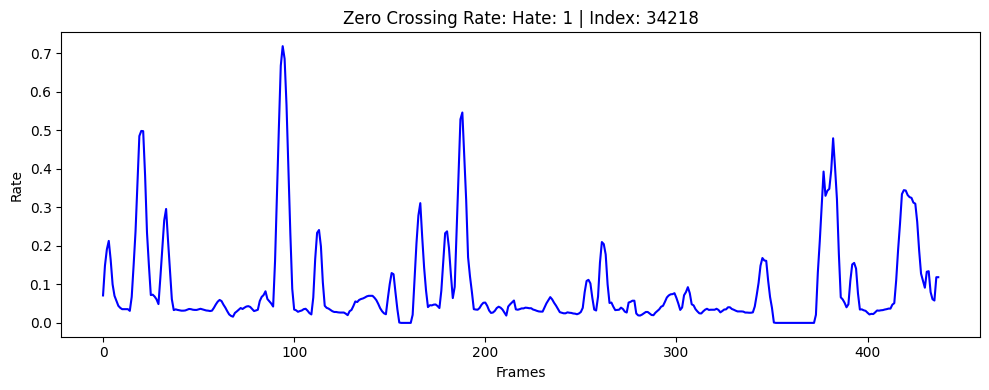

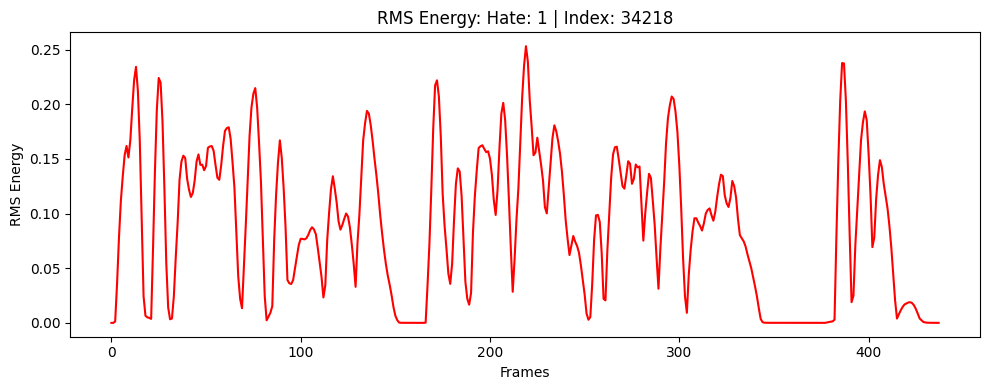

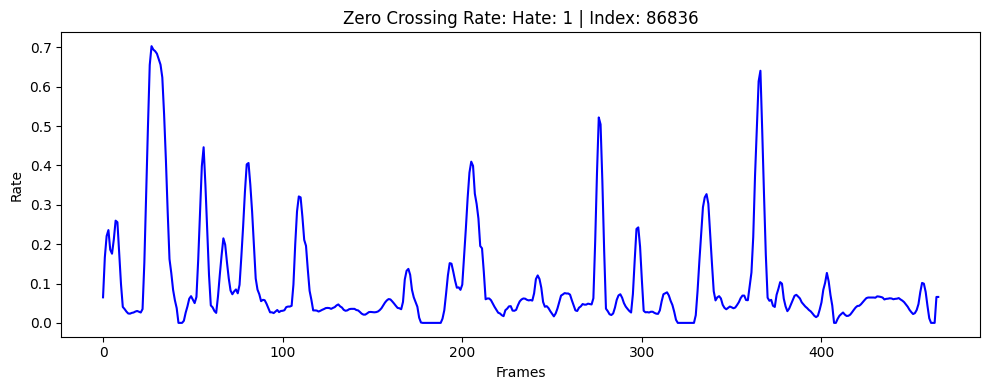

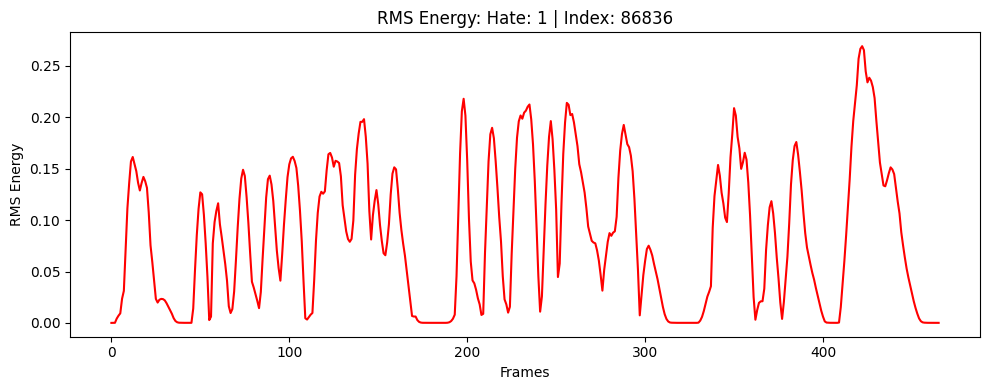

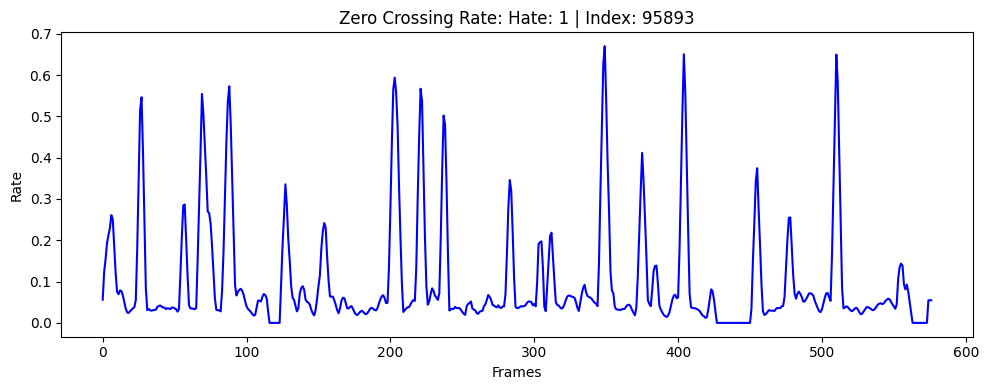

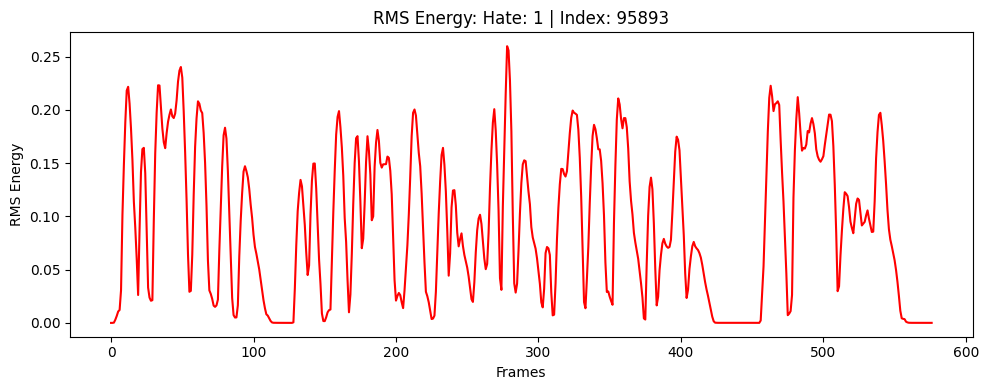

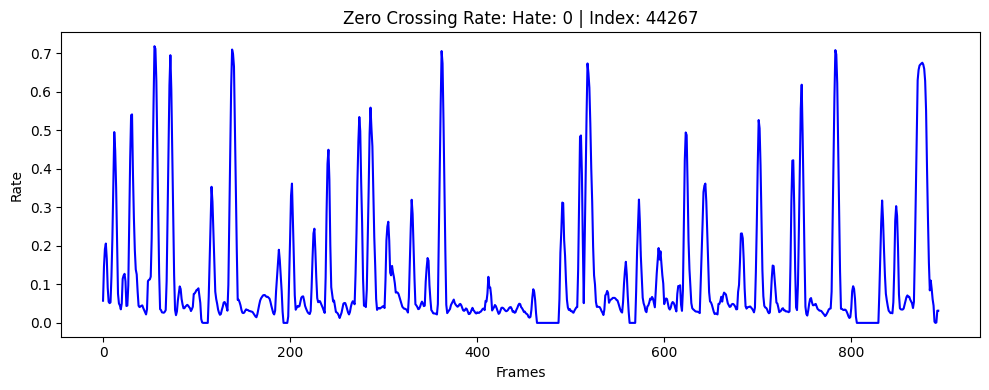

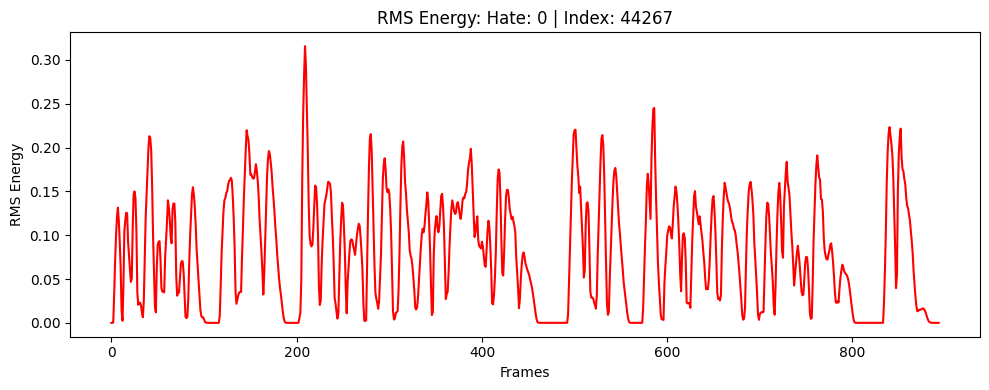

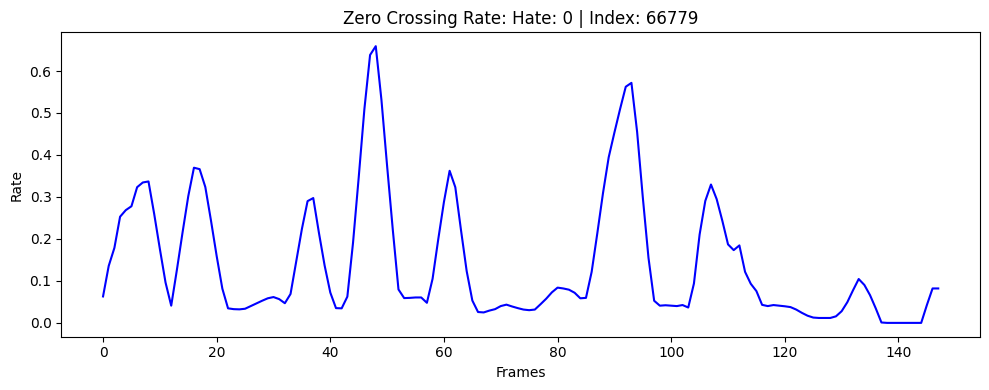

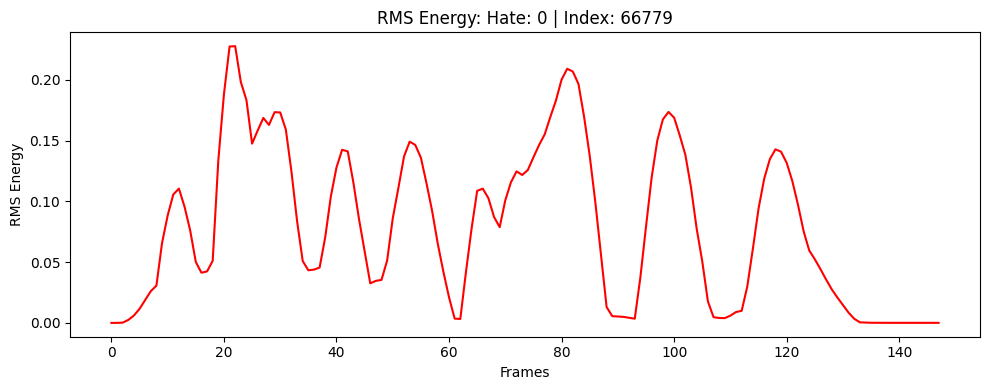

In [ ]:
for idx, row in df.sample(5).iterrows():
    title = f"Hate: {row['hate']} | Index: {row['index']}"
    file_path = row['audio']

    visualize_zero_crossing_rate(file_path, title)
    visualize_rms_energy(file_path, title)

In [ ]:
def visualize_pitch_and_harmonics(file_path, title):
    y, sr = librosa.load(file_path, sr=None)
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

    plt.figure(figsize=(10, 4))
    plt.plot(np.mean(pitches, axis=0), color='green')
    plt.title(f'Pitch and Harmonics: {title}')
    plt.xlabel('Frames')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

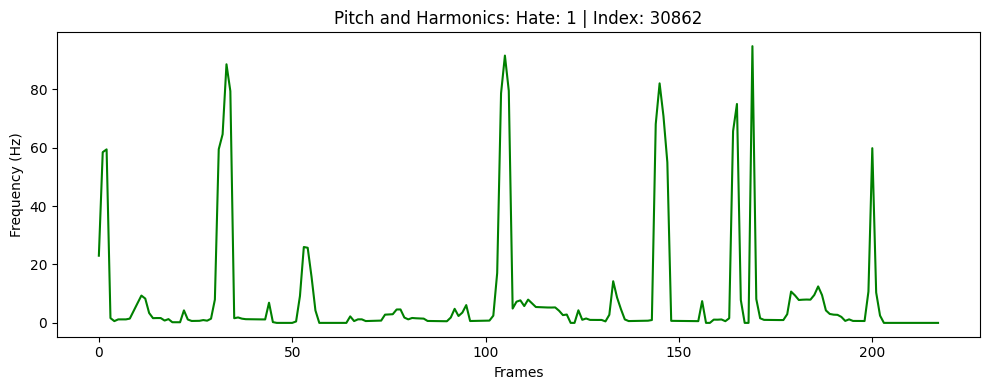

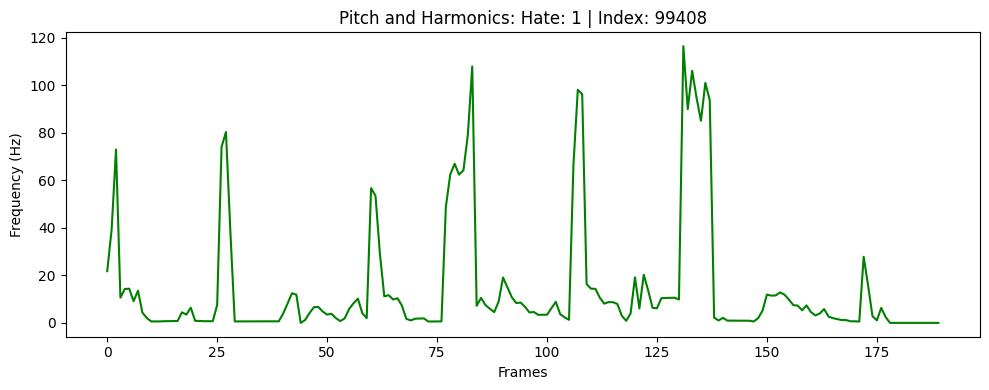

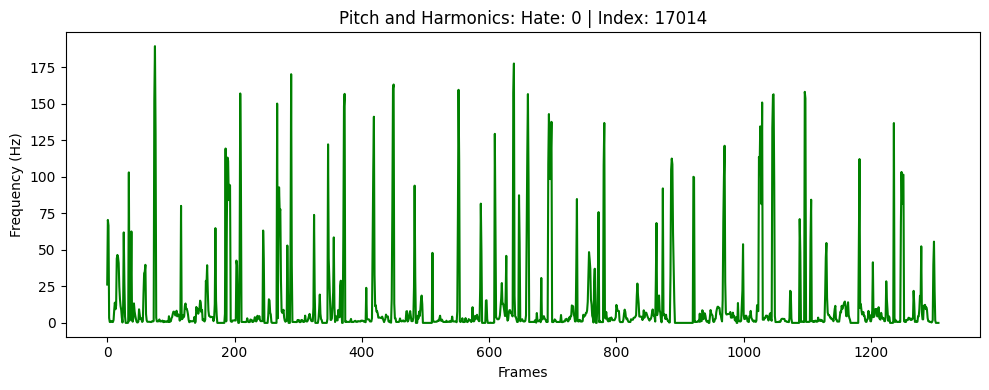

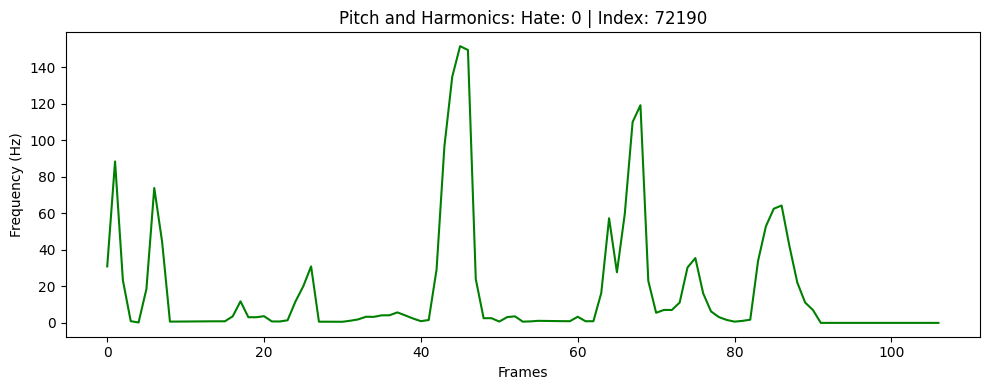

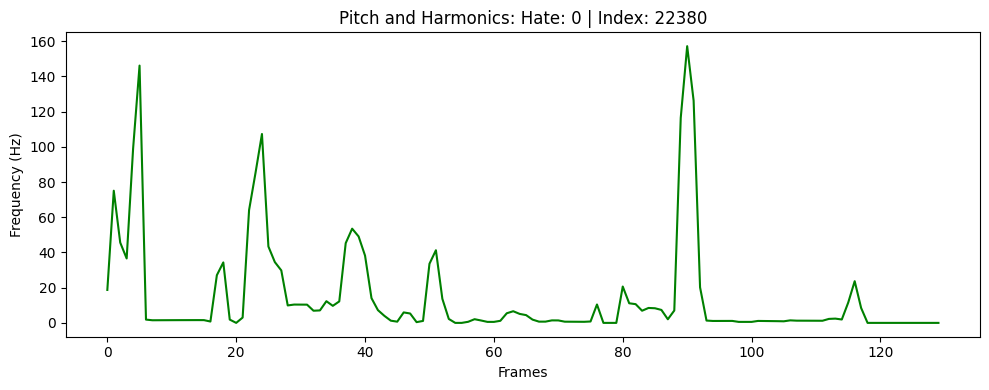

In [ ]:
for idx, row in df.sample(5).iterrows():
    title = f"Hate: {row['hate']} | Index: {row['index']}"
    file_path = row['audio']

    visualize_pitch_and_harmonics(file_path, title)

In [ ]:
def visualize_mfcc_delta(file_path, title):
    y, sr = librosa.load(file_path, sr=None)

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)

    plt.figure(figsize=(15, 6))
    plt.subplot(3, 1, 1)
    librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar()
    plt.title(f'MFCCs: {title}')
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficients')

    plt.subplot(3, 1, 2)
    librosa.display.specshow(delta_mfccs, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar()
    plt.title('Delta of MFCCs')
    plt.xlabel('Time (s)')
    plt.ylabel('Delta Coefficients')

    plt.subplot(3, 1, 3)
    librosa.display.specshow(delta2_mfccs, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar()
    plt.title('Delta-Delta of MFCCs')
    plt.xlabel('Time (s)')
    plt.ylabel('Delta-Delta Coefficients')

    plt.tight_layout()
    plt.show()

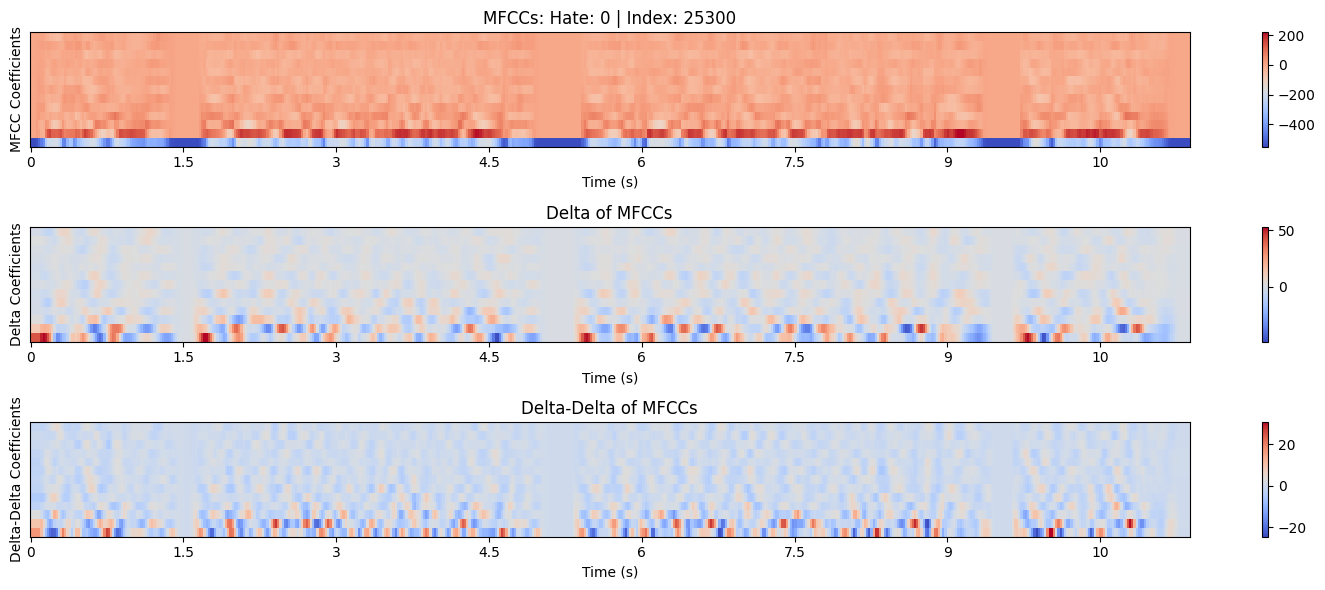

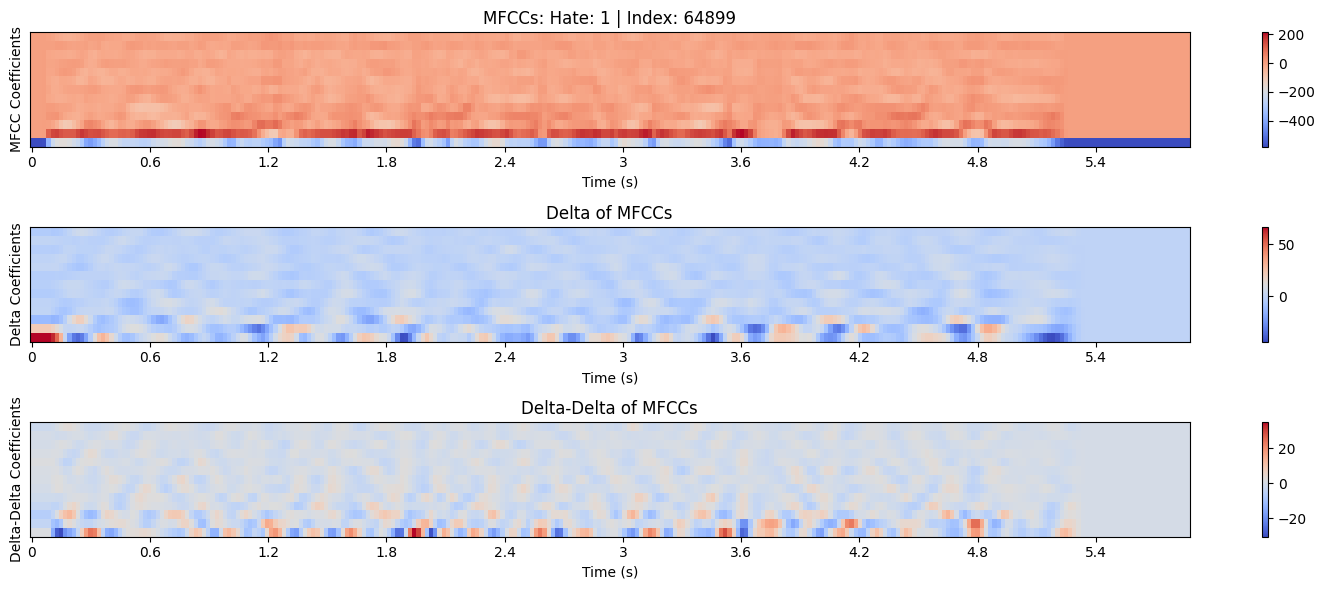

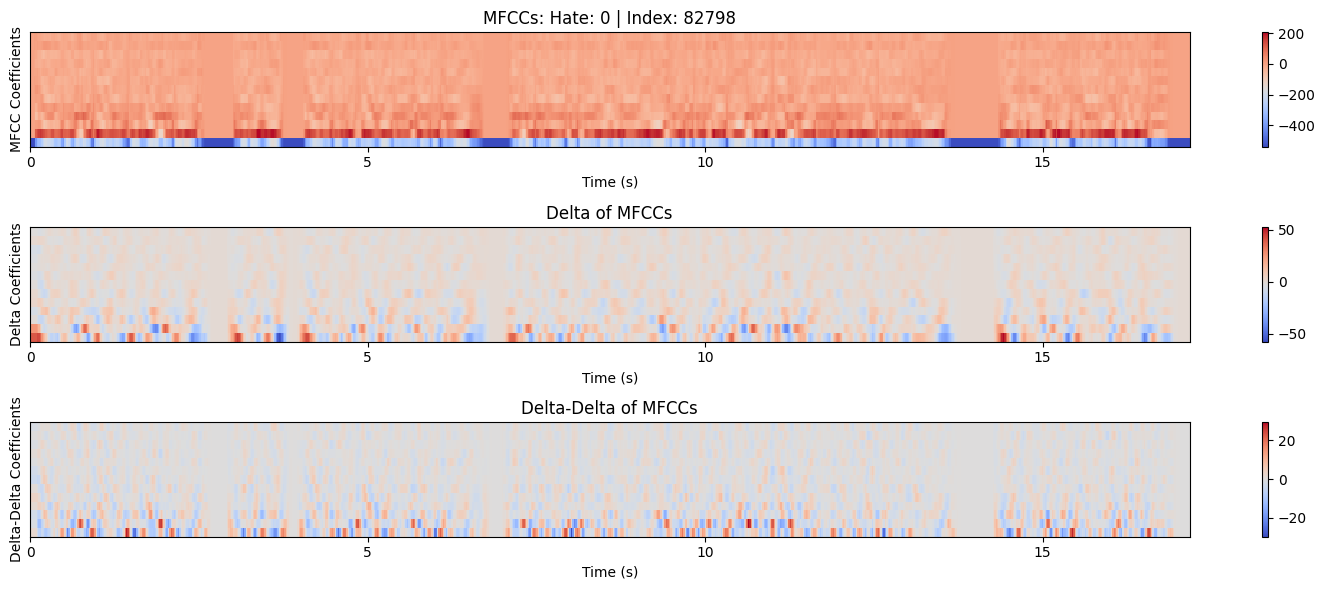

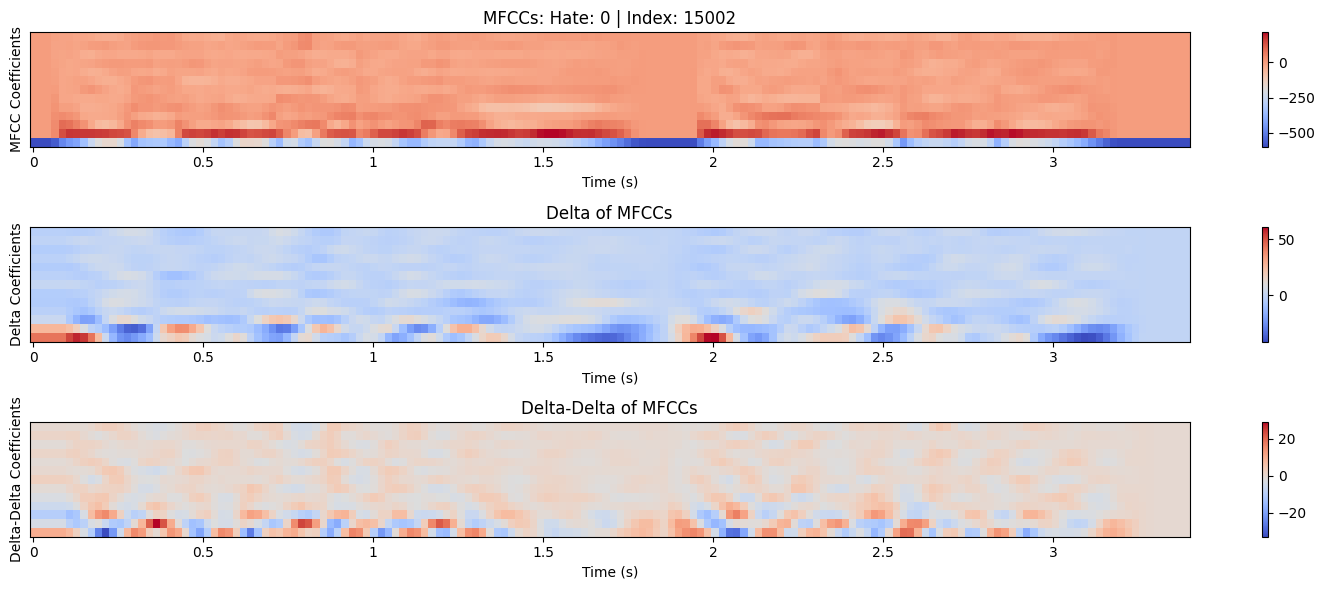

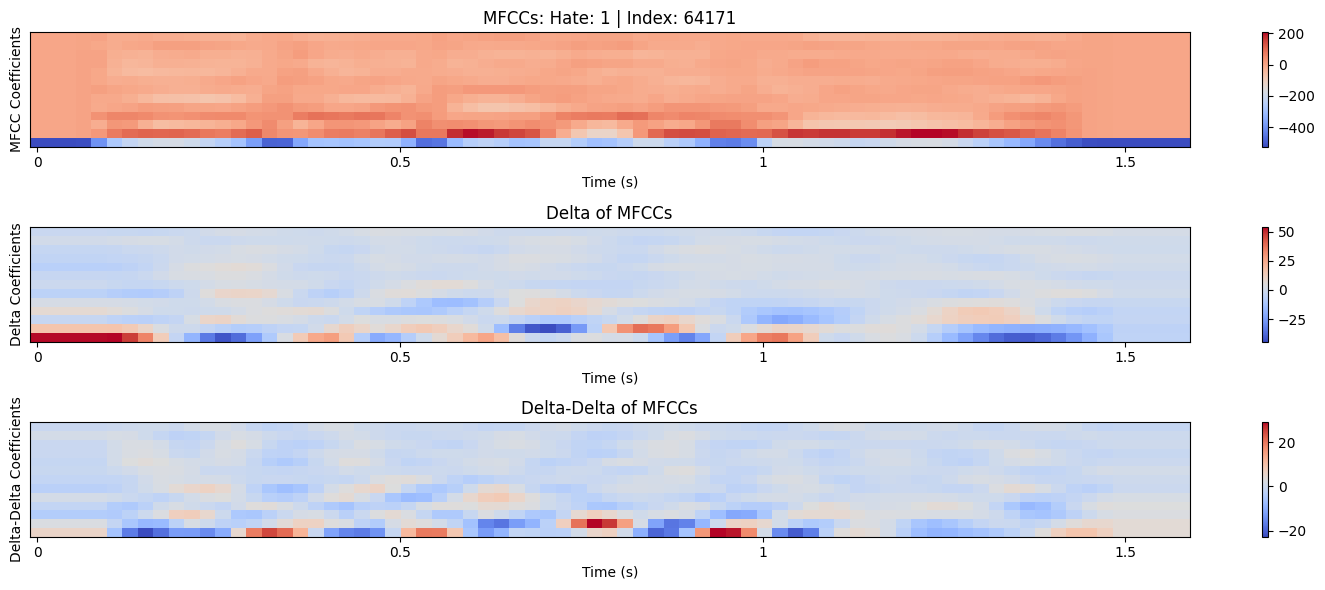

In [ ]:
for idx, row in df.sample(5).iterrows():
    title = f"Hate: {row['hate']} | Index: {row['index']}"
    file_path = row['audio']

    visualize_mfcc_delta(file_path, title)

In [ ]:
def visualize_spectral_centroid(file_path, title):
    y, sr = librosa.load(file_path, sr=None)

    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    frames = range(len(spectral_centroids))
    times = librosa.frames_to_time(frames, sr=sr)

    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr, alpha=0.5)
    plt.plot(times, spectral_centroids, color='red', label='Spectral Centroid')
    plt.title(f'Spectral Centroid: {title}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def visualize_spectral_rolloff(file_path, title):
    y, sr = librosa.load(file_path, sr=None)

    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)[0]
    frames = range(len(rolloff))
    times = librosa.frames_to_time(frames, sr=sr)

    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr, alpha=0.5)
    plt.plot(times, rolloff, color='green', label='Spectral Roll-Off (85%)')
    plt.title(f'Spectral Roll-Off: {title}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def visualize_spectral_bandwidth(file_path, title):
    y, sr = librosa.load(file_path, sr=None)

    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    frames = range(len(bandwidth))
    times = librosa.frames_to_time(frames, sr=sr)

    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr, alpha=0.5)
    plt.plot(times, bandwidth, color='purple', label='Spectral Bandwidth')
    plt.title(f'Spectral Bandwidth: {title}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.legend()
    plt.tight_layout()
    plt.show()

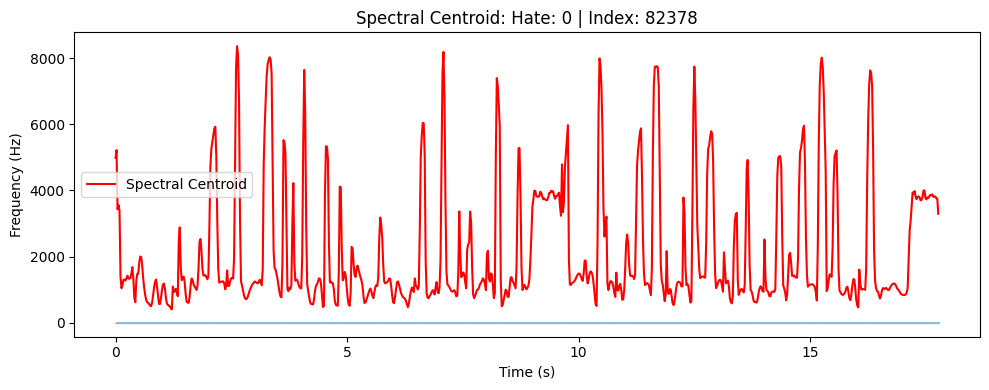

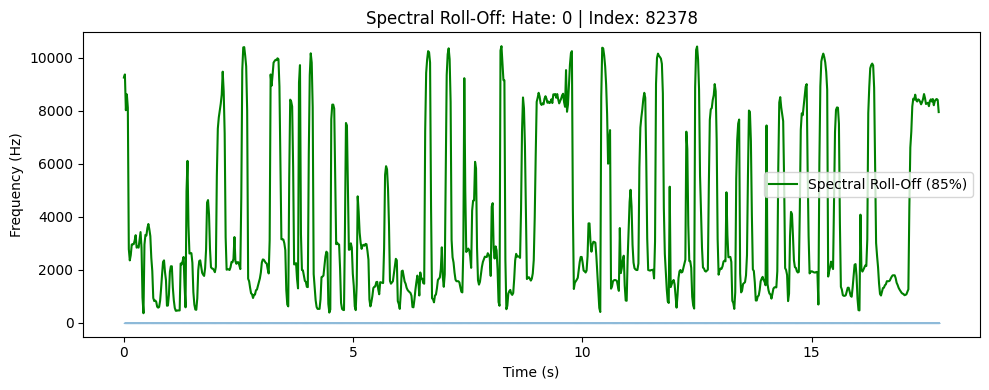

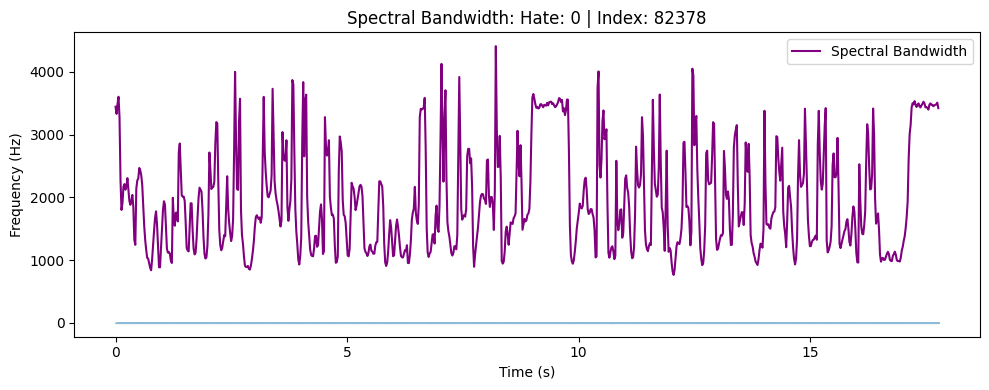

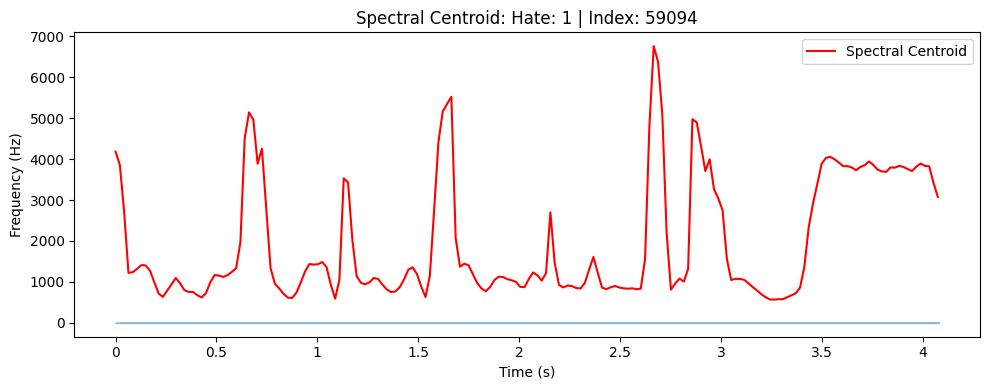

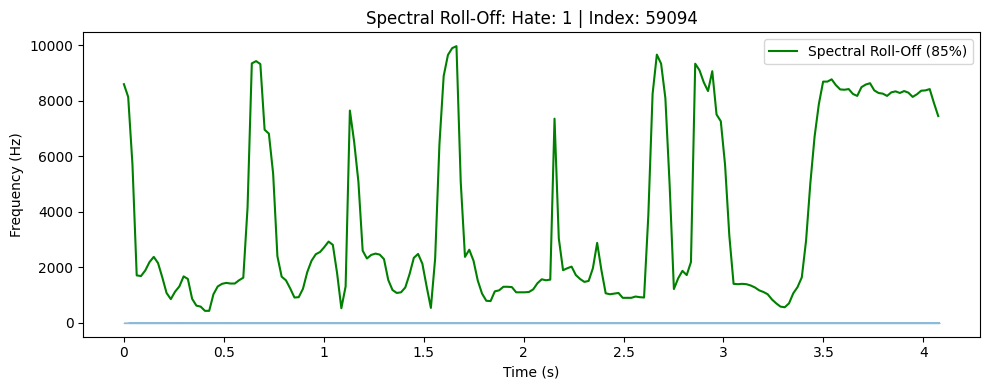

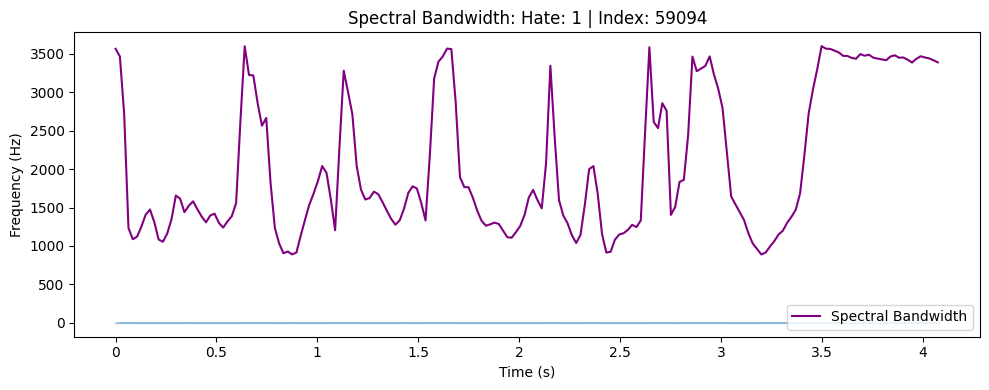

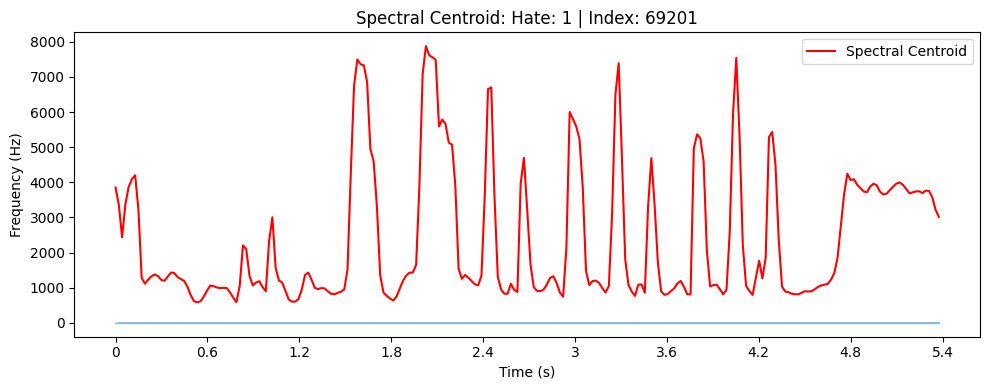

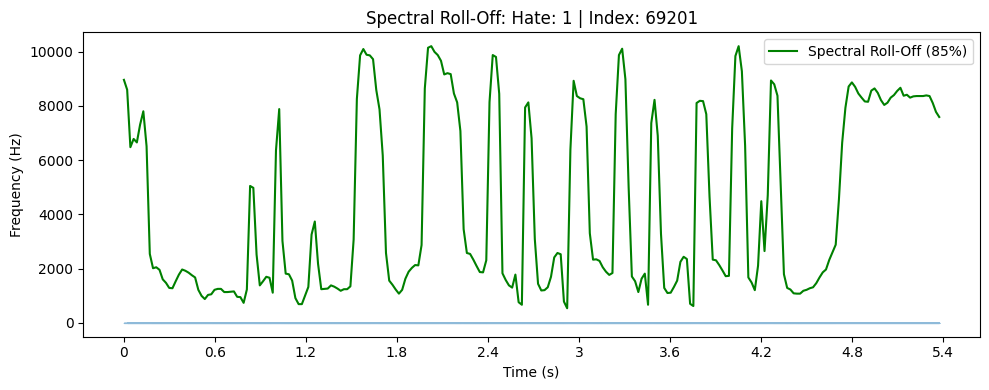

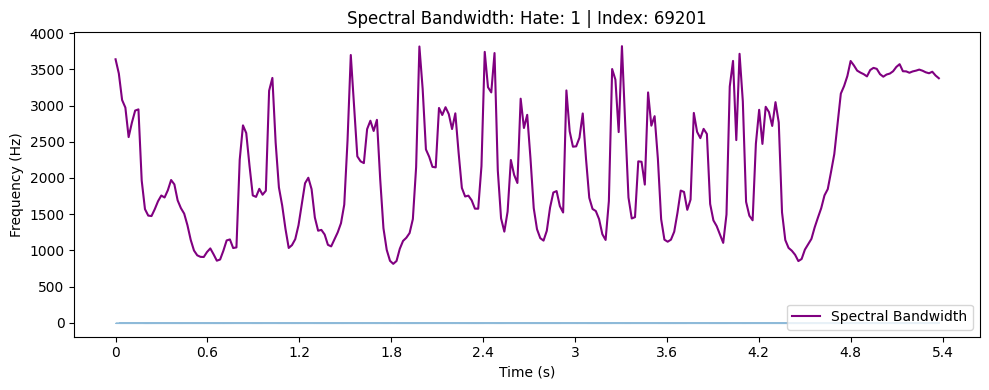

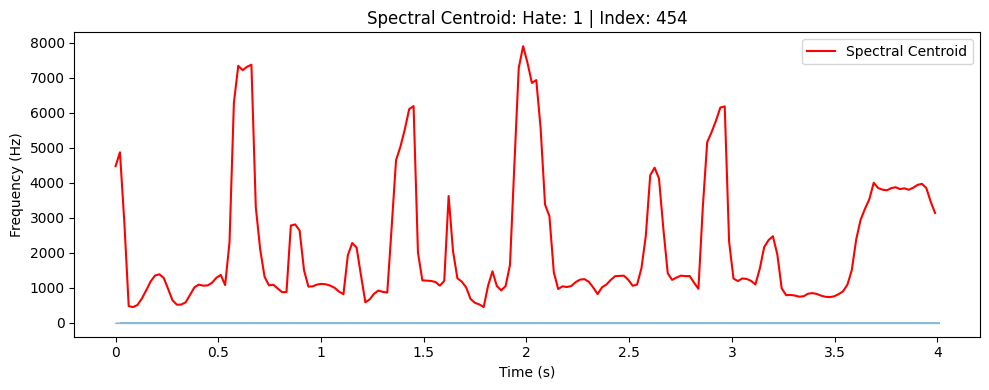

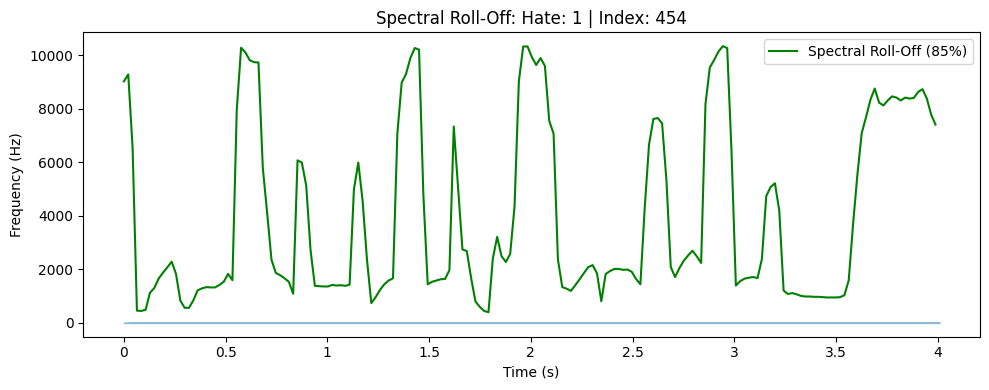

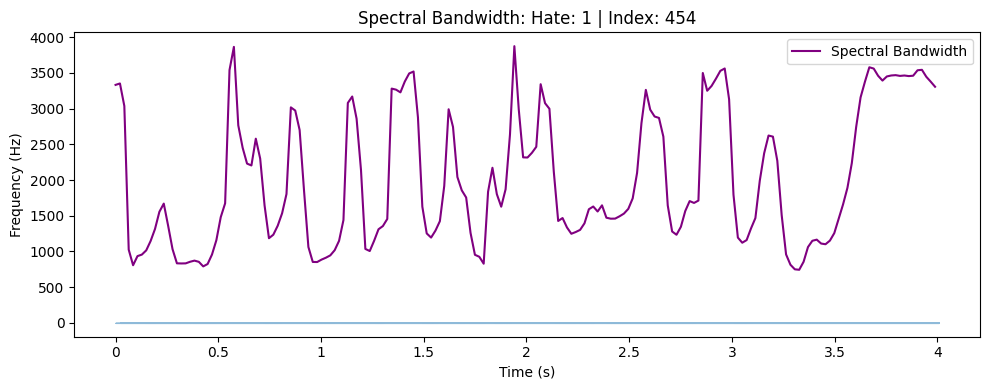

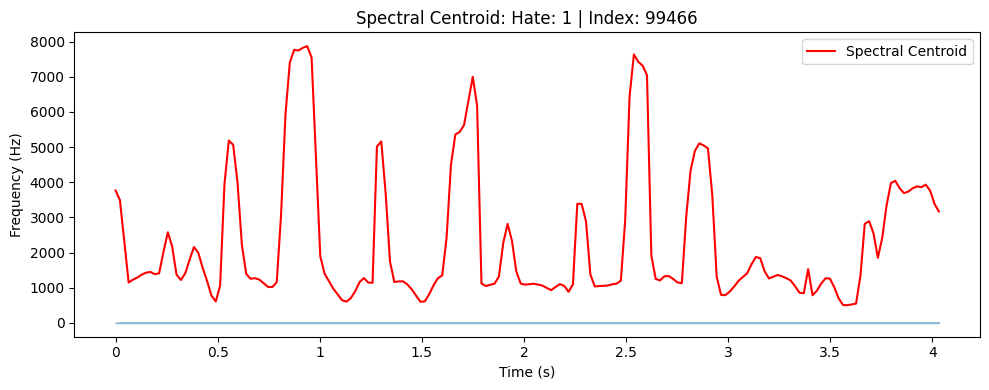

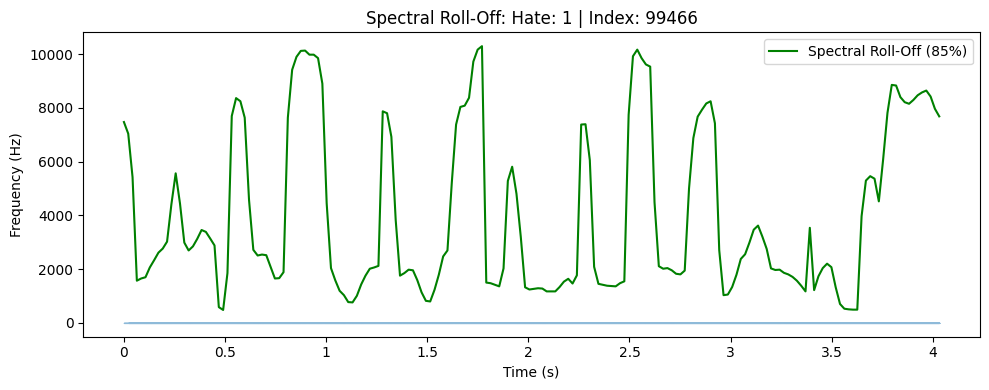

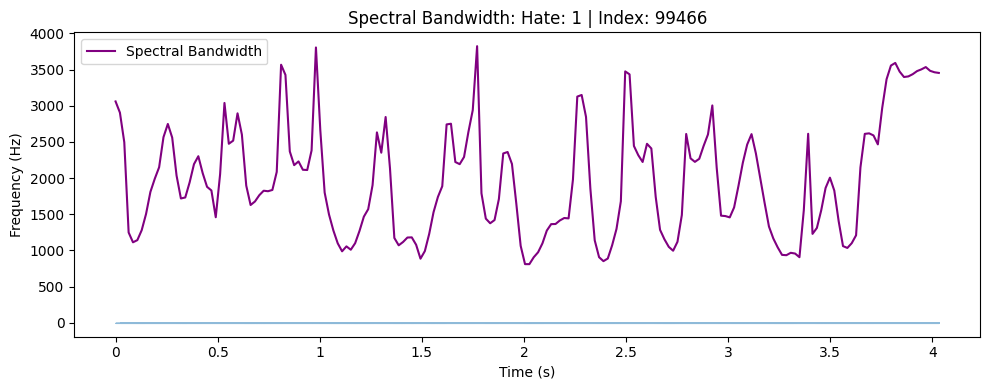

In [ ]:
for idx, row in df.sample(5).iterrows():
    title = f"Hate: {row['hate']} | Index: {row['index']}"
    file_path = row['audio']

    visualize_spectral_centroid(file_path, title)
    visualize_spectral_rolloff(file_path, title)
    visualize_spectral_bandwidth(file_path, title)

In [ ]:
def visualize_combined_features(file_path, title):
    y, sr = librosa.load(file_path, sr=None)

    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    times = librosa.frames_to_time(range(len(spectral_centroids)), sr=sr)

    plt.figure(figsize=(10, 6))
    librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Waveform')
    plt.plot(times, spectral_centroids, color='red', label='Spectral Centroid')
    plt.plot(times, spectral_rolloff, color='green', label='Spectral Roll-Off')
    plt.plot(times, bandwidth, color='purple', label='Spectral Bandwidth')
    plt.title(f'Combined Features: {title}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.legend()
    plt.tight_layout()
    plt.show()

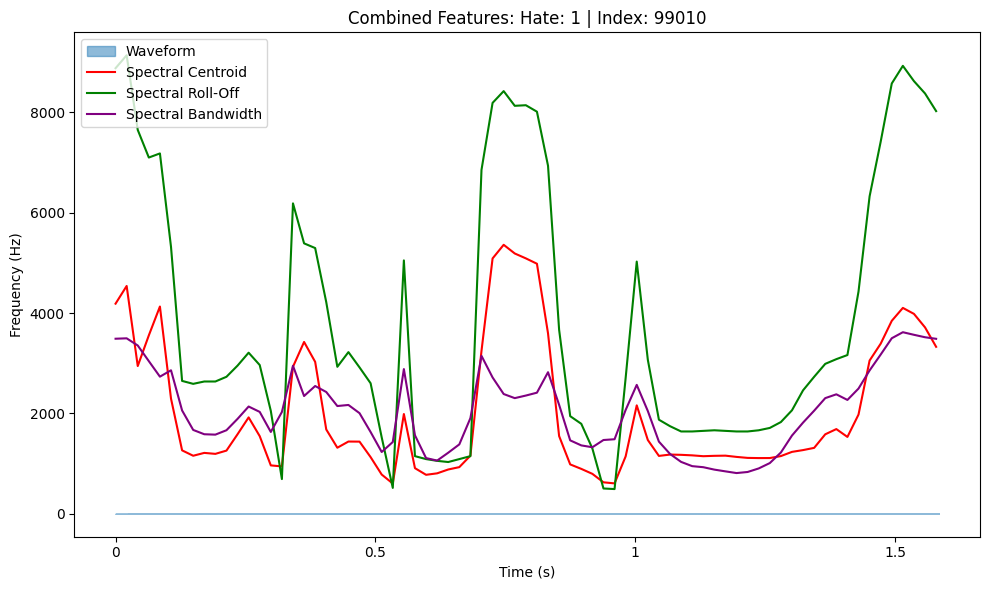

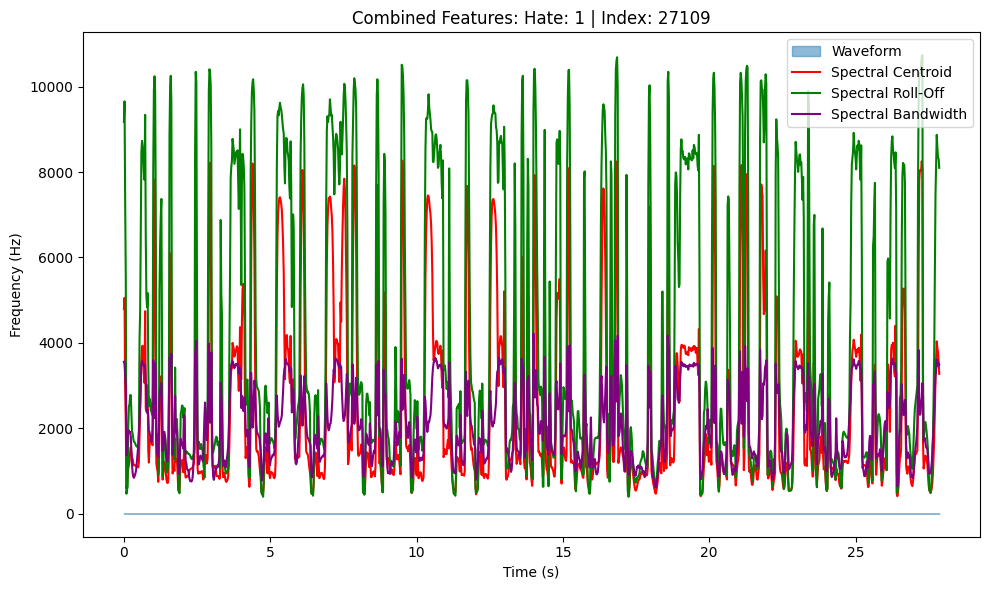

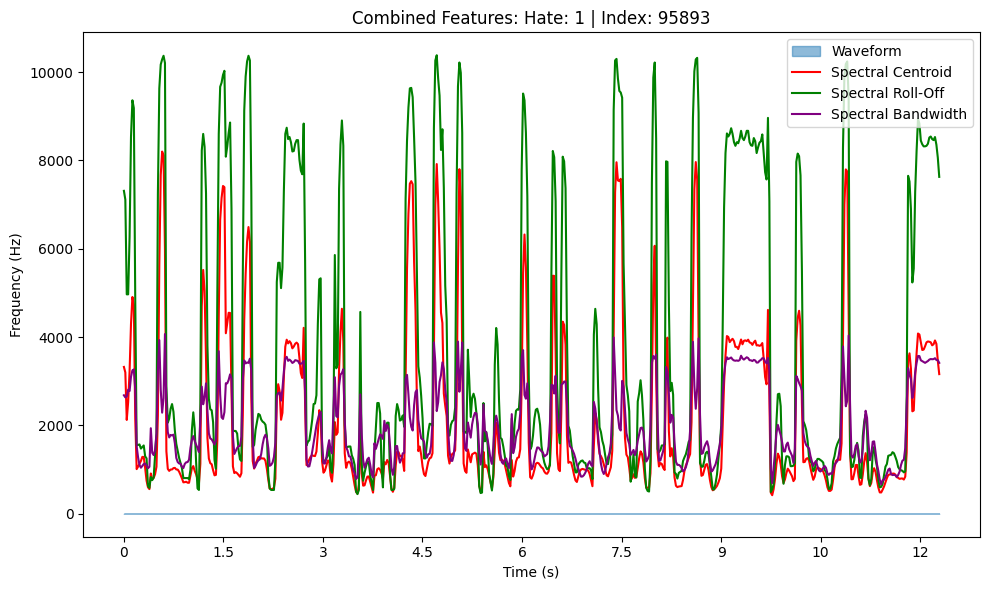

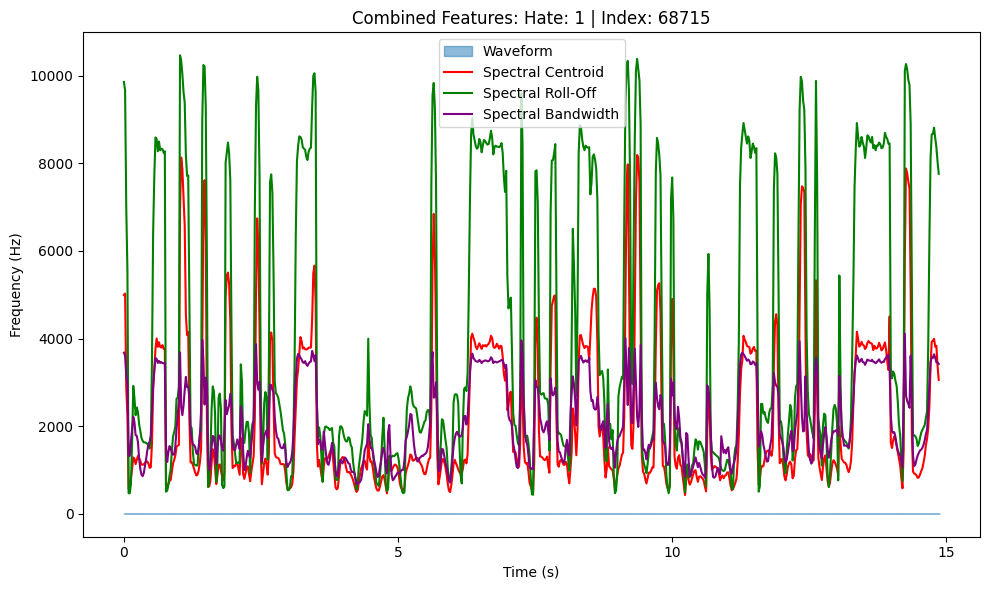

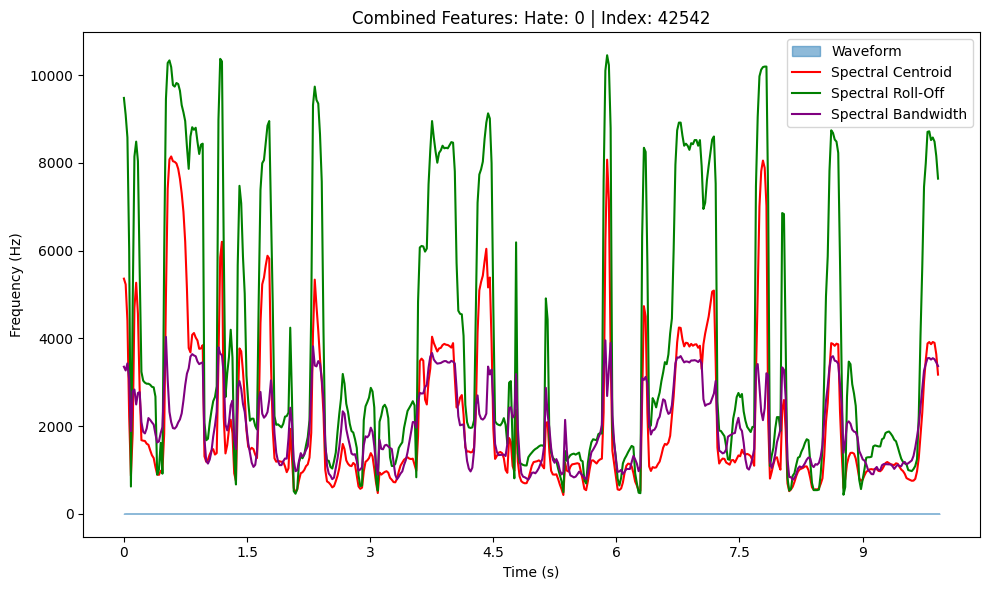

In [ ]:
for idx, row in df.sample(5).iterrows():
    title = f"Hate: {row['hate']} | Index: {row['index']}"
    file_path = row['audio']

    visualize_combined_features(file_path, title)

## Sample Augmentation

In [ ]:
!pip install --upgrade --quiet audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 26.0 MB/s eta 0:00:00


In [ ]:
import random
import soundfile as sf
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import os
from IPython.display import Audio

output_dir = '/content/drive/MyDrive/IPD/code/audio/augmented_tts'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
def augment_audio(file_path, output_path, sample_rate=22050):
    y, sr = librosa.load(file_path, sr=sample_rate)

    time_stretch = random.uniform(0.8, 1.2)
    y = librosa.effects.time_stretch(y, rate=time_stretch)

    pitch_shift = random.randint(-2, 2)
    y = librosa.effects.pitch_shift(y, sr=sr, n_steps=pitch_shift)

    noise = np.random.normal(0, 0.005, y.shape[0])
    y = y + noise

    volume_factor = random.uniform(0.7, 1.3)
    y = y * volume_factor

    sf.write(output_path, y, sr)

In [ ]:
file_paths = []
for idx, row in df.sample(3).iterrows():
    file_path = row['audio']
    file_paths.append(file_path)
    label = row['hate']
    augmented_filename = f"augmented_{row['index']}_{label}.wav"
    augmented_file_path = os.path.join(output_dir, augmented_filename)
    augment_audio(file_path, augmented_file_path)

In [ ]:
Audio(file_paths[2])

In [ ]:
augmenter = Compose([
    AddGaussianNoise(min_amplitude=0.005, max_amplitude=0.02, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.2, p=0.5),
    PitchShift(min_semitones=-2, max_semitones=2, p=0.5),
    Shift(min_shift=-0.1, max_shift=0.1, p=0.5),
])

def augment_audio_with_pipeline(file_path, output_path):
    y, sr = librosa.load(file_path, sr=None)
    augmented_audio = augmenter(samples=y, sample_rate=sr)
    sf.write(output_path, augmented_audio, sr)

In [ ]:
file_paths = []
for idx, row in df.sample(3).iterrows():
    file_path = row['audio']
    file_paths.append(file_path)
    label = row['hate']
    augmented_filename = f"augmented_{row['index']}_{label}.wav"
    augmented_file_path = os.path.join(output_dir, augmented_filename)
    augment_audio_with_pipeline(file_path, augmented_file_path)

In [ ]:
Audio(file_paths[2])

In [ ]:
for f in os.listdir(output_dir):
    file_path = os.path.join(output_dir, f)
    os.remove(file_path)

## Applying Augmentation to whole dataset

In [ ]:
!pip install --upgrade --quiet audiomentations

In [ ]:
import random
import soundfile as sf
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import os
from IPython.display import Audio

output_dir = '/content/drive/MyDrive/IPD/code/audio/augmented_tts'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
df.head()

index                                               text  hate  \
0     48  @odysseuslahori @IqShoaib Hang till death all ...     1   
1     84  "where they ultimately need to be" is back in ...     1   
2    126  "I'm trying to take you out" to "you don't loo...     1   
3    298            Facts . That's why I cut these hoes off     1   
4    454  "I'm a whore! Yay! Glorify being a whore! This...     1   

                                               audio  
0  /content/drive/MyDrive/IPD/code/audio/claude_t...  
1  /content/drive/MyDrive/IPD/code/audio/claude_t...  
2  /content/drive/MyDrive/IPD/code/audio/claude_t...  
3  /content/drive/MyDrive/IPD/code/audio/claude_t...  
4  /content/drive/MyDrive/IPD/code/audio/claude_t...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   1000 non-null   int64 
 1   text    1000 non-null   object
 2   hate    1000 non-null   int64 
 3   audio   1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [ ]:
augmenter = Compose([
    AddGaussianNoise(min_amplitude=0.005, max_amplitude=0.02, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.2, p=0.5),
    PitchShift(min_semitones=-2, max_semitones=2, p=0.5),
    Shift(min_shift=-0.1, max_shift=0.1, p=0.5),
])

In [ ]:
def augment_and_return_path(row):
    file_path = row['audio']
    label = row['hate']

    augmented_filename = f"augmented_{row['index']}_{label}.wav"
    augmented_file_path = os.path.join(output_dir, augmented_filename)

    y, sr = librosa.load(file_path, sr=None)
    augmented_audio = augmenter(samples=y, sample_rate=sr)
    sf.write(augmented_file_path, augmented_audio, sr)

    return augmented_file_path

In [ ]:
df['augment'] = df.apply(augment_and_return_path, axis=1)

In [ ]:
len(augment_paths)

1000

In [ ]:
for f in os.listdir(output_dir):
    file_path = os.path.join(output_dir, f)
    idx = file_path[62 : -6]
    df.loc[idx, 'augment'] = file_path

In [ ]:
df.head()

index                                               text  hate  \
0   48.0  @odysseuslahori @IqShoaib Hang till death all ...   1.0   
1   84.0  "where they ultimately need to be" is back in ...   1.0   
2  126.0  "I'm trying to take you out" to "you don't loo...   1.0   
3  298.0            Facts . That's why I cut these hoes off   1.0   
4  454.0  "I'm a whore! Yay! Glorify being a whore! This...   1.0   

                                               audio  \
0  /content/drive/MyDrive/IPD/code/audio/claude_t...   
1  /content/drive/MyDrive/IPD/code/audio/claude_t...   
2  /content/drive/MyDrive/IPD/code/audio/claude_t...   
3  /content/drive/MyDrive/IPD/code/audio/claude_t...   
4  /content/drive/MyDrive/IPD/code/audio/claude_t...   

                                             augment  
0  /content/drive/MyDrive/IPD/code/audio/augmente...  
1  /content/drive/MyDrive/IPD/code/audio/augmente...  
2  /content/drive/MyDrive/IPD/code/audio/augmente...  
3  /content/drive/MyDrive/IPD/code/audio/augmente...  
4  /content/drive/MyDrive/IPD/code/audio/augmente...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 135302
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    1000 non-null   float64
 1   text     1000 non-null   object 
 2   hate     1000 non-null   float64
 3   audio    1000 non-null   object 
 4   augment  3000 non-null   object 
dtypes: float64(2), object(3)
memory usage: 205.2+ KB


In [ ]:
df.to_csv('augmented_audio_paths.csv', index=False)